 MACHINE LEARNING PROJECT

 TOPIC : **Logistic Regression**
***



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

<h3>About the dataset:</h3><br>
<b><i>Weekly: </i></b>The dataset is about the weekly percentage returns for the S&P 500 stock index between 1990 and 2010. It is a data frame with 1089 observations on the following 9 variables.<br><br>
<i>Columns in the dataset: </i>

<ul>
    <li>Year: The year that the observation was recorded</li>
    <li>Lag1: Percentage return for previous week</li>
    <li>Lag2: Percentage return for 2 weeks previous</li>
    <li>Lag3: Percentage return for 3 weeks previous</li>
    <li>Lag4: Percentage return for 4 weeks previous</li>
    <li>Lag5: Percentage return for 5 weeks previous</li>
    <li>Volume: Volume of shares traded (average number of daily shares traded in billions)</li>
    <li>Today: Percentage return for this week</li>
    <li>Direction: A factor with levels Down and Up indicating whether the market had a positive or negative return on a given week</li>
</ul>

In [ ]:
#Loading the Weekly dataset
Weekly=pd.read_csv("E:\Datasets\ML\Weekly.csv")
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


<h3>Exploratory Data Analysis</h3>

In [ ]:
#Checking for null values
Weekly.isna().sum().sum()

0

There are no null values in the dataset.

In [ ]:
#Shape of the data
print("No. of rows: ",Weekly.shape[0],"\n""No. of columns: ",Weekly.shape[1])

No. of rows:  1089 
No. of columns:  9


In [ ]:
Weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [ ]:
#Numerical summary of the dataset
Weekly.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1089.0,2000.048669,6.033182,1990.000000,1995.000000,2000.00000,2005.000000,2010.000000
Lag1,1089.0,0.150585,2.357013,-18.195000,-1.154000,0.24100,1.405000,12.026000
Lag2,1089.0,0.151079,2.357254,-18.195000,-1.154000,0.24100,1.409000,12.026000
Lag3,1089.0,0.147205,2.360502,-18.195000,-1.158000,0.24100,1.409000,12.026000
Lag4,1089.0,0.145818,2.360279,-18.195000,-1.158000,0.23800,1.409000,12.026000
Lag5,1089.0,0.139893,2.361285,-18.195000,-1.166000,0.23400,1.405000,12.026000
Volume,1089.0,1.574618,1.686636,0.087465,0.332022,1.00268,2.053727,9.328214
Today,1089.0,0.149899,2.356927,-18.195000,-1.154000,0.24100,1.405000,12.026000


In [ ]:
Weekly["Direction"].value_counts()

Up      605
Down    484
Name: Direction, dtype: int64

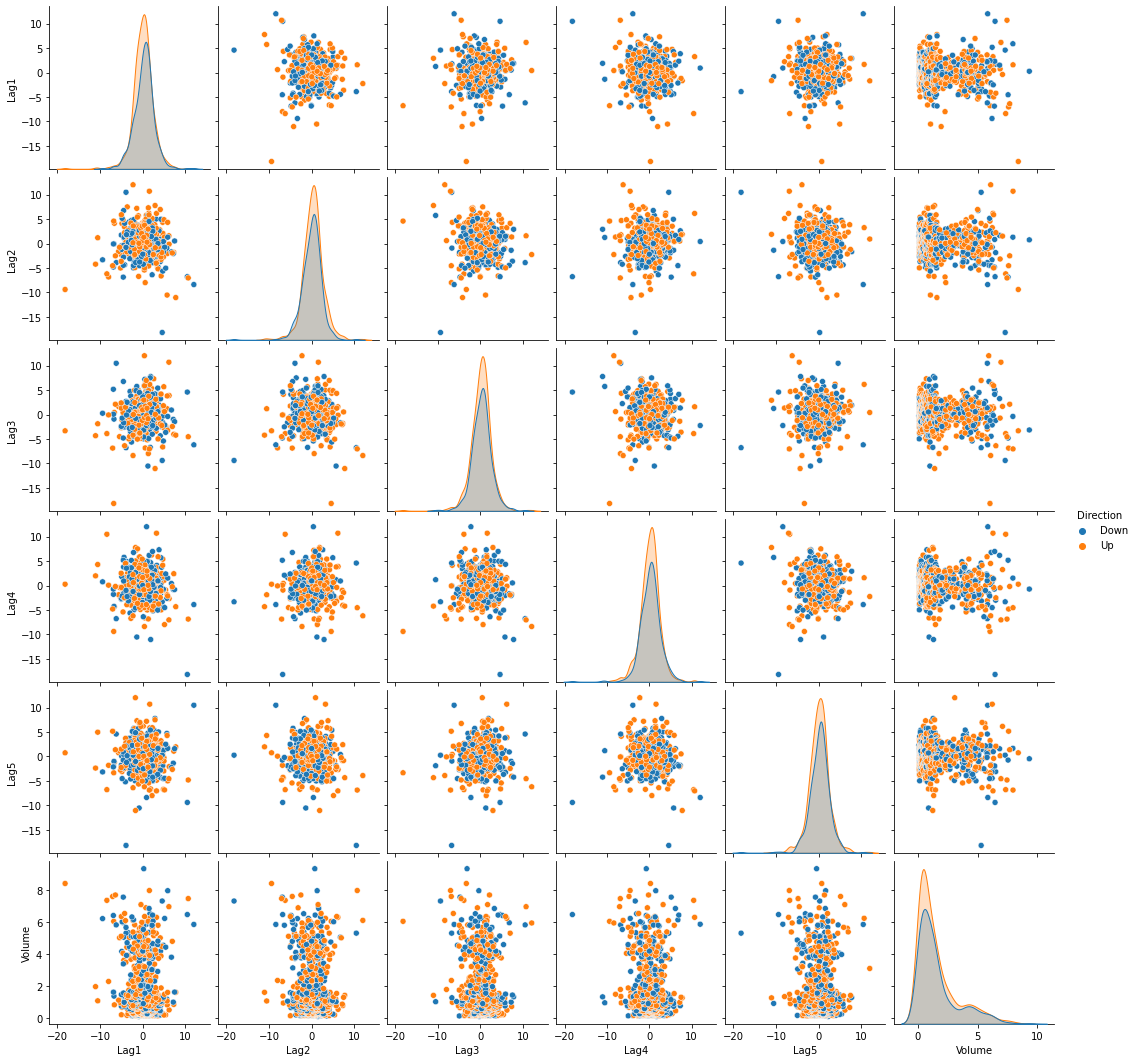

In [ ]:
#Graphical summary of the dataset
sns.pairplot(Weekly, vars=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], hue='Direction')

<b><i>Interpretation:</i></b> From the above numerical and graphical summeries, we can observe from the scatterplot of just volume over time, that the number of shares traded each week has grown exponentially over the 21 years covered by the data.

<AxesSubplot:>

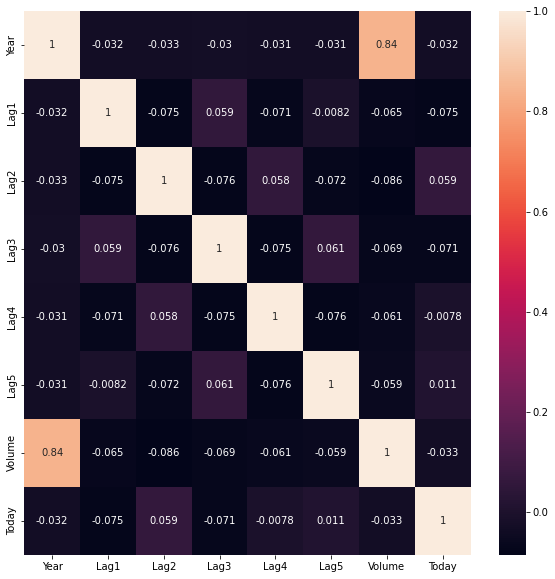

In [ ]:
#Heatmap of the correlation matrix of all the variables in the dataset.
plt.figure(figsize=(10,10))
corr_matrix = Weekly.corr()
sns.heatmap(corr_matrix, annot=True)

<b><i>Interpretation: </i></b>From the above heatmap of the correlation matrix, we can observe each of the lag variables is only correlated very weakly with today's returns. The only strong correlation we can observe from the above heatmap is 0.84 that is between Volume and Year.

In [ ]:
Weekly['Direction_Cat'] = Weekly['Direction'].map({'Down': 0, 'Up': 1})
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_Cat
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1


In [ ]:
#Independent Variables
X= pd.DataFrame(Weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']])
#Dependent Variable
Y= pd.DataFrame(Weekly[['Direction_Cat']])

In [ ]:
#Spliting the data into training and test sets using the scikit-learn train_test_split() function.
x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.3)
train_Weekly=pd.concat([y_train,x_train])

In [ ]:
lrm=LogisticRegression()
print(lrm.fit(x_train,y_train))

LogisticRegression()


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred=lrm.predict(x_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)

In [ ]:
print(acc)
print(f1)
print(rec)
print(prec)

0.5198776758409785
0.6762886597938143
0.9425287356321839
0.5273311897106109


In [ ]:
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

In [ ]:
#Fitting logistic regression
lr = sm.Logit(y_train,x_train).fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.680321
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          Direction_Cat   No. Observations:                  762
Model:                          Logit   Df Residuals:                      755
Method:                           MLE   Df Model:                            6
Date:                Sun, 26 Mar 2023   Pseudo R-squ.:                0.006122
Time:                        13:58:51   Log-Likelihood:                -518.40
converged:                       True   LL-Null:                       -521.60
Covariance Type:            nonrobust   LLR p-value:                    0.3814
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2555      0.103      2.482      0.013       0.054       0.457
Lag1          -0.0341      0.

<b><i>Interpretation: </i></b>From the above summary, we can observe that the only statistically significant predictor is Lag2, with a p-value of 0.027 providing evidence at the 5% significance level to reject the null hypothesis that it is not related to the response "Direction". There are 762 rows in our training dataset.

In [ ]:
#Computing the confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[  6 147]
 [ 10 164]]


Here,
<ul>
    <li>True Positive: 14</li>
    <li>True Negative: 153</li>
    <li>False Positive: 147</li>
    <li>False Negative: 13</li>
</ul>

From the above confusion matrix and classification table, we can observe that the logistic regression model correctly predicted 14 down weeks out of a total of 152 actual down weeks and 157 up days out of a total of 175 actual up weeks in the testing dataset. This means that the model correctly predicted the direction for 171 weeks out of the 327(total observations in the testing dataset).